In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [4]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEF5L,Thurston,Lacey,WA,98516.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,22.0,124535071,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1CP1K,King,Sammamish,WA,98074.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,45.0,102359449,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJXCDE28G,King,Kent,WA,98031.0,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,33.0,228682037,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303509e+10
4,WA1F2AFY4P,Thurston,Olympia,WA,98501.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,234923230,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [6]:
column_info = df.dtypes.reset_index()
column_info.columns = ['Column Name', 'Data Type']

print(column_info)

                                          Column Name Data Type
0                                          VIN (1-10)    object
1                                              County    object
2                                                City    object
3                                               State    object
4                                         Postal Code   float64
5                                          Model Year     int64
6                                                Make    object
7                                               Model    object
8                               Electric Vehicle Type    object
9   Clean Alternative Fuel Vehicle (CAFV) Eligibility    object
10                                     Electric Range     int64
11                                          Base MSRP     int64
12                               Legislative District   float64
13                                     DOL Vehicle ID     int64
14                                   Veh

In [7]:
summary_stats = df.describe()
print(summary_stats)

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  162999.000000  163003.000000   163003.000000  163003.000000   
mean    98170.717422    2020.258449       63.382183    1198.344632   
std      2467.998984       3.005057       94.323062    8825.505678   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000       0.000000   
50%     98122.000000    2021.000000       13.000000       0.000000   
75%     98370.000000    2023.000000       84.000000       0.000000   
max     99577.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         162637.000000    1.630030e+05       1.629990e+05  
mean              29.226861    2.153918e+08       5.297368e+10  
std               14.841717    7.874180e+07       1.612977e+09  
min                1.000000    4.385000e+03       1.081042e+09  
25%               18.000000    1.762441e+08 

In [8]:
unique_values = df.nunique().reset_index()
unique_values.columns = ['Column Name', 'Unique Values']
print(unique_values)

                                          Column Name  Unique Values
0                                          VIN (1-10)          10086
1                                              County            186
2                                                City            706
3                                               State             45
4                                         Postal Code            843
5                                          Model Year             22
6                                                Make             39
7                                               Model            136
8                               Electric Vehicle Type              2
9   Clean Alternative Fuel Vehicle (CAFV) Eligibility              3
10                                     Electric Range            102
11                                          Base MSRP             31
12                               Legislative District             49
13                                

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 366
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64


In [10]:
columns_to_impute = ['County', 'City', 'Postal Code', 'Electric Utility', '2020 Census Tract']
for column in columns_to_impute:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [11]:
df['Legislative District'].fillna(df['Legislative District'].median(), inplace=True)

In [12]:
df.dropna(subset=['Vehicle Location','Model'], inplace=True)
missing_values = df.isnull().sum()
print(missing_values)

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [13]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEF5L,Thurston,Lacey,WA,98516.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,22.0,124535071,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1CP1K,King,Sammamish,WA,98074.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,45.0,102359449,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJXCDE28G,King,Kent,WA,98031.0,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,33.0,228682037,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303509e+10
4,WA1F2AFY4P,Thurston,Olympia,WA,98501.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,234923230,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


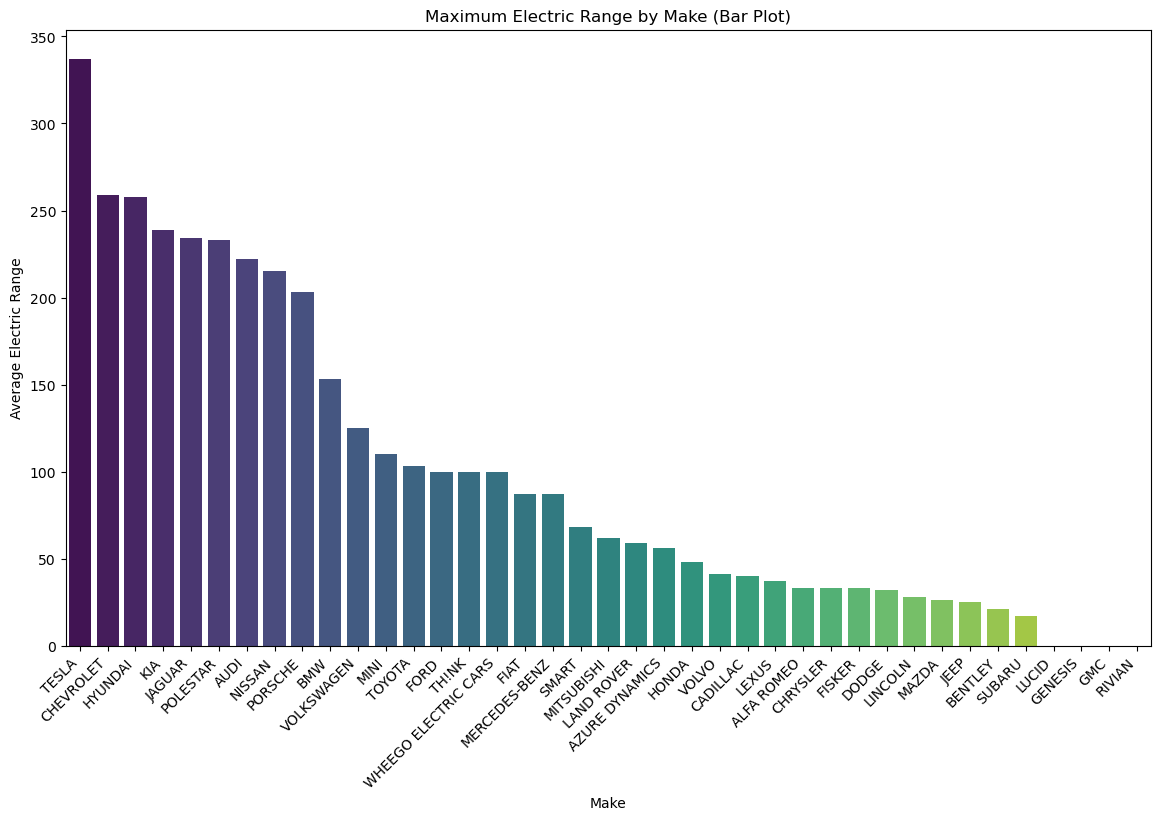

In [14]:
avg_electric_range_by_make = df.groupby('Make')['Electric Range'].max().reset_index()

# Sort the DataFrame by electric range in descending order
avg_electric_range_by_make = avg_electric_range_by_make.sort_values(by='Electric Range', ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Make', y='Electric Range', data=avg_electric_range_by_make, palette='viridis')
plt.title('Maximum Electric Range by Make (Bar Plot)')
plt.xlabel('Make')
plt.ylabel('Average Electric Range')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


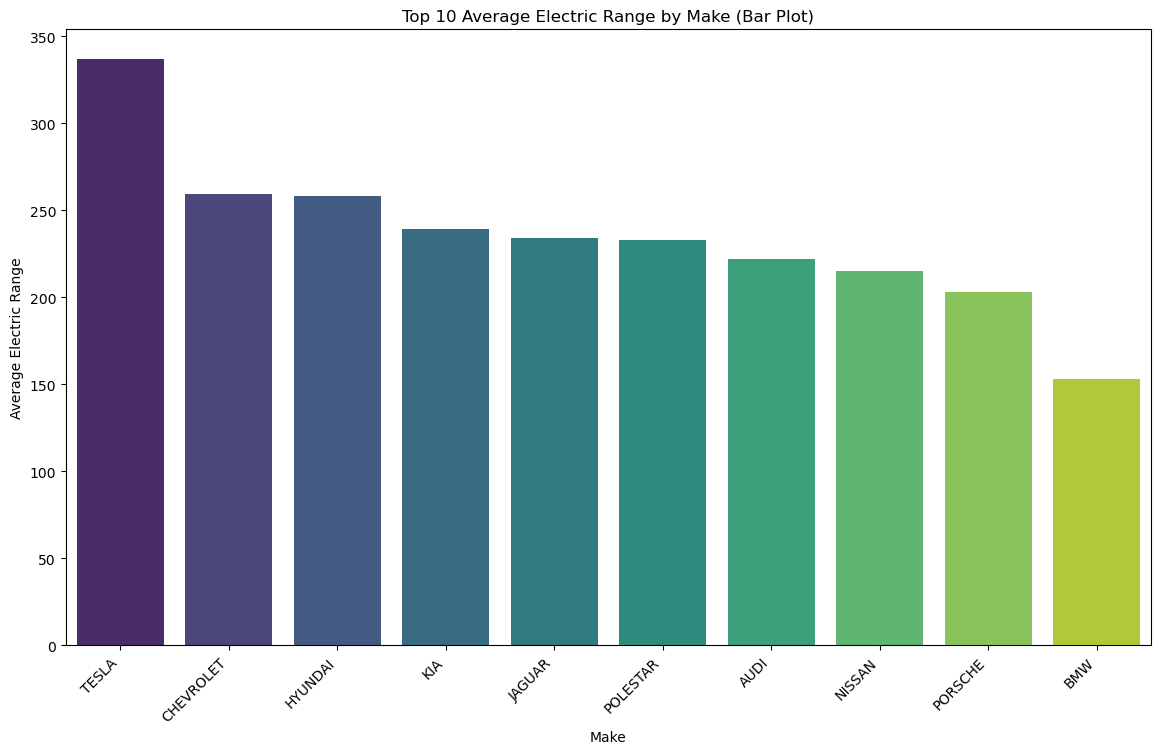

In [15]:
avg_electric_range_by_make = avg_electric_range_by_make.sort_values(by='Electric Range', ascending=False)

# Select the top 10 makes
top_10_makes = avg_electric_range_by_make.head(10)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Make', y='Electric Range', data=top_10_makes, palette='viridis')
plt.title('Top 10 Average Electric Range by Make (Bar Plot)')
plt.xlabel('Make')
plt.ylabel('Average Electric Range')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

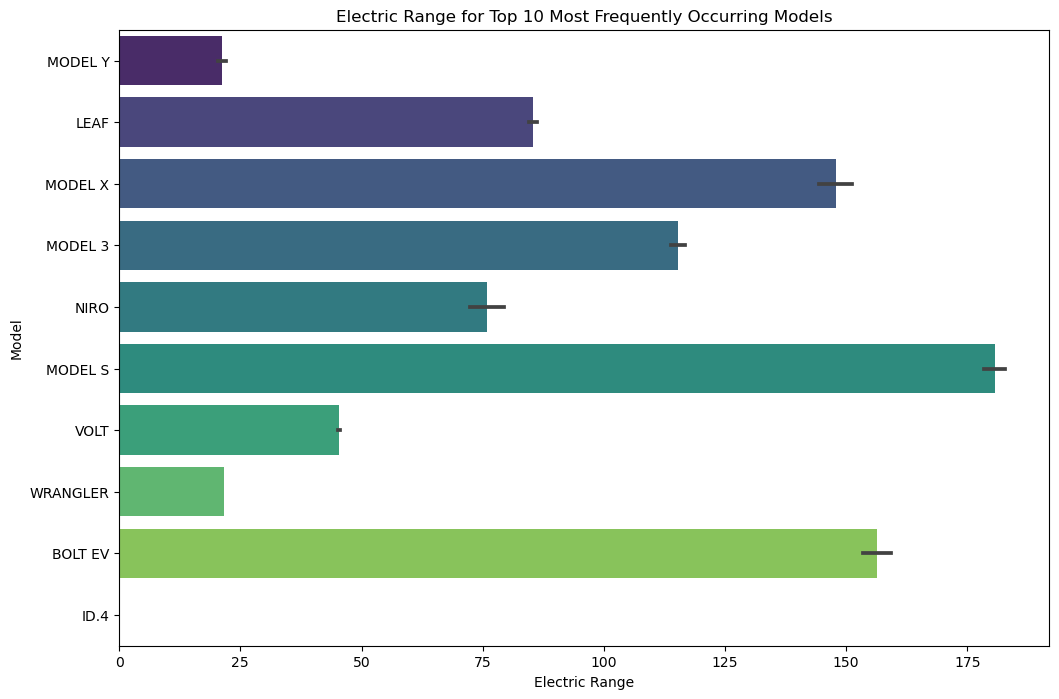

In [16]:
top_models = df['Model'].value_counts().head(10).index

# Filter the DataFrame for the top models
top_models_data = df[df['Model'].isin(top_models)]

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Electric Range', y='Model', data=top_models_data, palette='viridis', orient='h')
plt.title('Electric Range for Top 10 Most Frequently Occurring Models')
plt.xlabel('Electric Range')
plt.ylabel('Model')
plt.show()

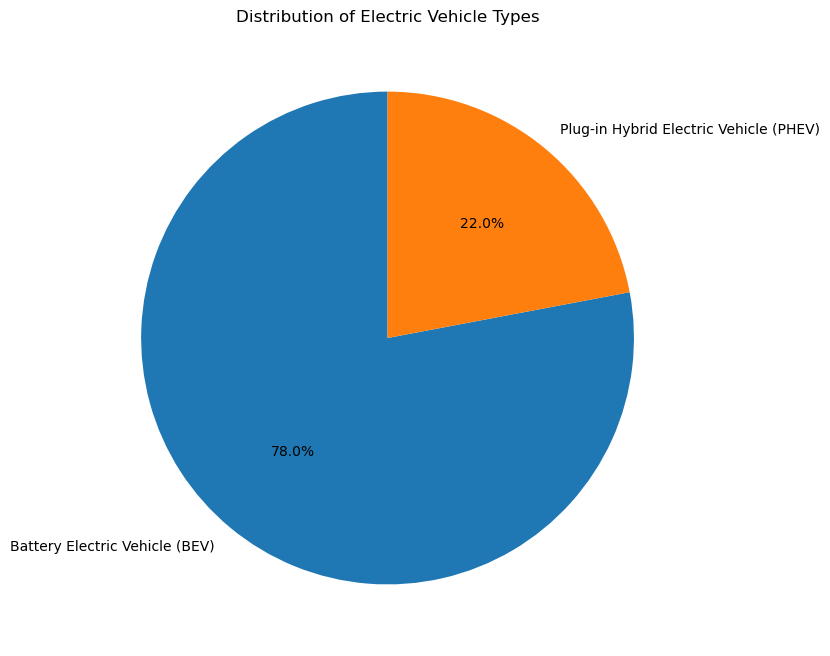

In [17]:
electric_vehicle_types_distribution = df['Electric Vehicle Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(electric_vehicle_types_distribution, labels=electric_vehicle_types_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Electric Vehicle Types')
plt.show()

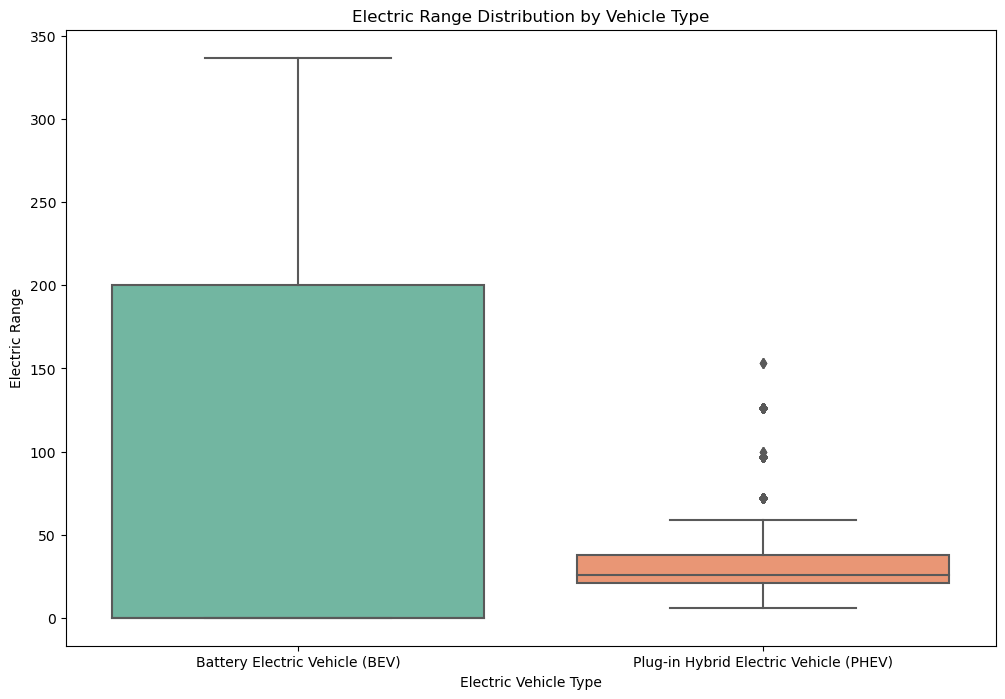

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, palette='Set2')
plt.title('Electric Range Distribution by Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range')
plt.show()


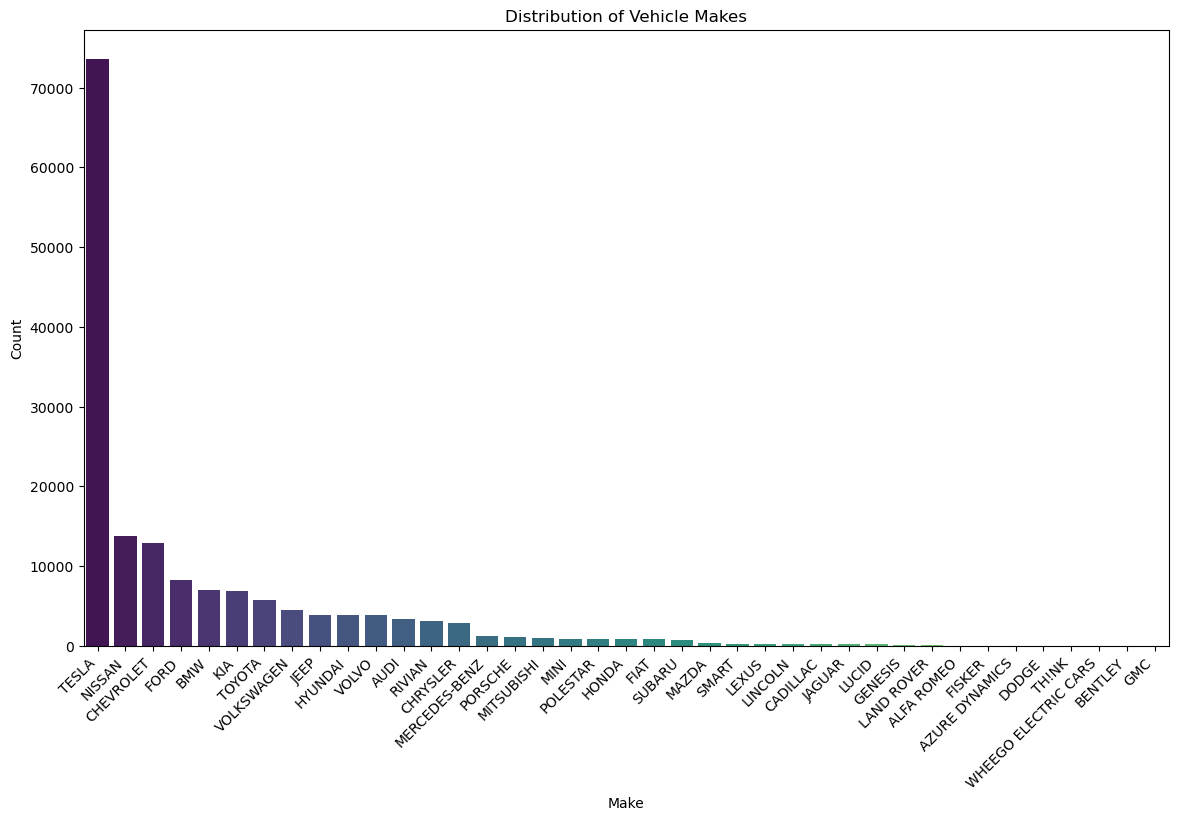

In [19]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Make', data=df, order=df['Make'].value_counts().index, palette='viridis')
plt.title('Distribution of Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

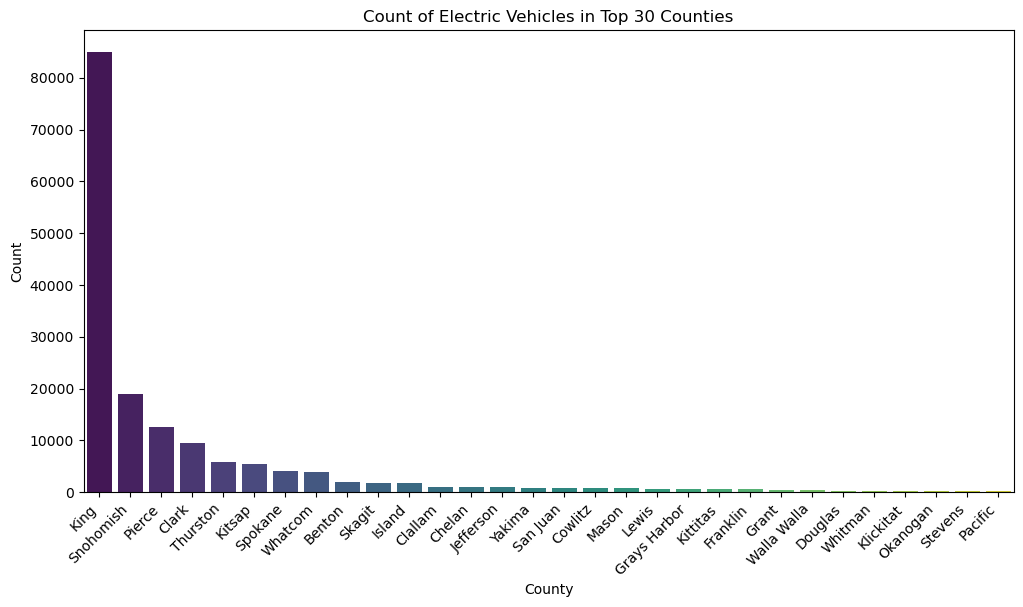

In [22]:
top_counties = df['County'].value_counts().head(30).index

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='County', data=df[df['County'].isin(top_counties)], palette='viridis', order=top_counties)



plt.title('Count of Electric Vehicles in Top 30 Counties')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


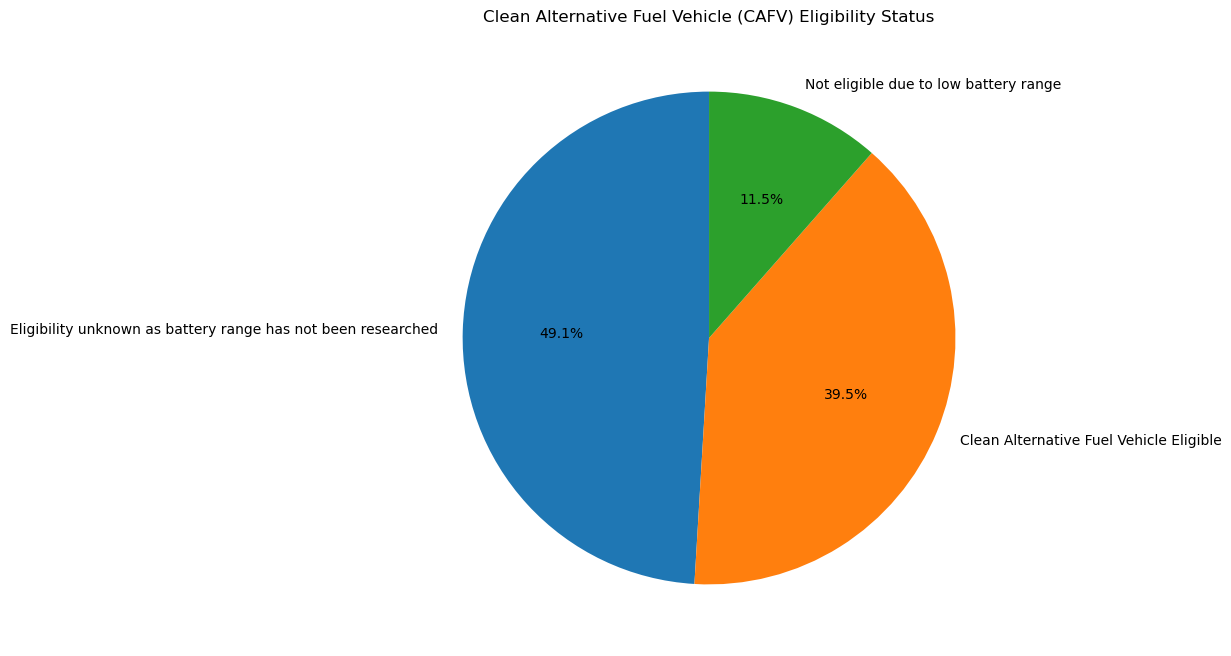

In [21]:
electric_vehicle_types_distribution = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(electric_vehicle_types_distribution, labels=electric_vehicle_types_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility Status')
plt.show()